In [38]:
import pandas as pd
import numpy as np

# Load the dataset (replace 'file.csv' with your dataset's file path)
data = pd.read_csv('./P1_Churn_Modelling.csv')
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#delete the column row number
data=data.drop('RowNumber',axis=1)
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#get basic information
print(data.head())



   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


In [5]:

# Get dataset info
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


In [6]:
# Get basic statistics of numerical columns
print(data.describe())


         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   

In [7]:

# View the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (10000, 13)


In [9]:
#delete the row where any cell is equal to zero
#there is no missing data as count is equal to shape[0]
data[data['Age']==0].sum()


CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

In [10]:
#checking messing values
# Check for missing values in each column
print(data.isnull().sum())


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [13]:
#balance is skewed to the left , mean is less than 50%
data['Balance'].skew()


-0.14110871094154384

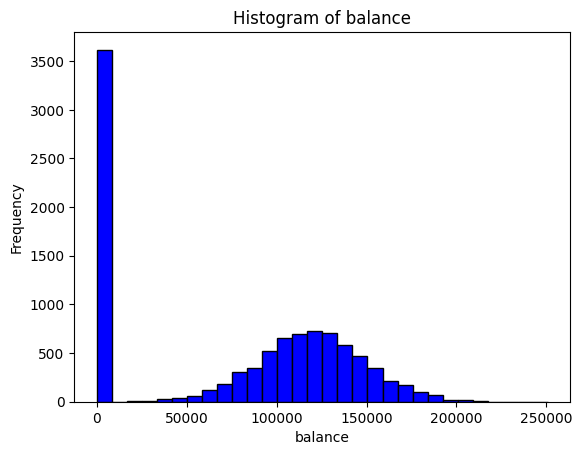

In [4]:
import matplotlib.pyplot as plt

plt.hist(data['Balance'], bins=30, color="blue", edgecolor="black")
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.title("Histogram of balance")
plt.show()

In [8]:
data[data['Balance']<0].sum()


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

In [ ]:
print(data['Balance'].min()) # then boxcox() will fail if data is 0 or negative

0.0


In [ ]:
# import numpy as np

# data['Balance'] = np.log1p(data['Balance']) # log1p(x) = log(1 + x) to avoid log(0) the skewness is larger than the bast so you needn't do that
data['Balance'].skew()


np.float64(-0.5708284896191692)

In [ ]:
# from scipy.stats import yeojohnson
# import numpy as np
# data['Balance'], lambda_value = yeojohnson(data['Balance'])  
# data['Balance'].skew()
#it is a mild skewness that doens't with the algorihtm , it needs skewness larger than 0.5


np.float64(-0.5685677962225228)

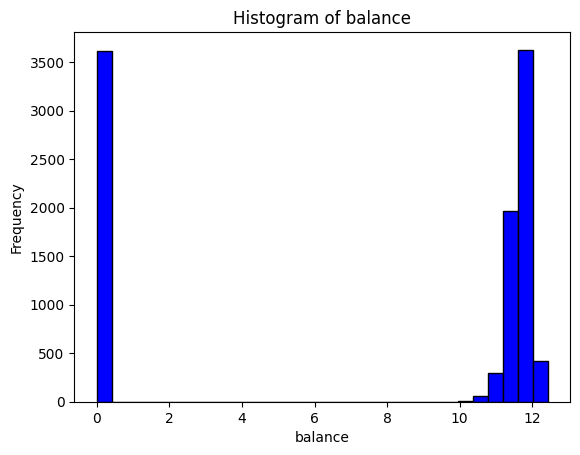

In [16]:
import matplotlib.pyplot as plt

plt.hist(data['Balance'], bins=30, color="blue", edgecolor="black")
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.title("Histogram of balance")
plt.show()

In [ ]:
#and may be estimated salary
data['EstimatedSalary'].skew()#it is mild and perfect

np.float64(0.0020853576615585162)

In [19]:
#may be the number of products -> max and 75%
data['NumOfProducts'].skew()

np.float64(0.7455678882823168)

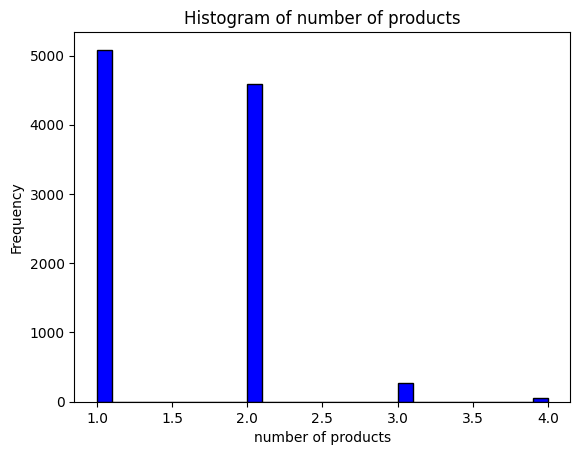

In [20]:
plt.hist(data['NumOfProducts'], bins=30, color="blue", edgecolor="black")
plt.xlabel("number of products")
plt.ylabel("Frequency")
plt.title("Histogram of number of products")
plt.show()

In [40]:
# products skewness


from scipy.stats import yeojohnson
import numpy as np
data['NumOfProducts'], lambda_value = yeojohnson(data['NumOfProducts'])  
data['NumOfProducts'].skew()#each time you run , the value changes, i ran it four times unit become 0

np.float64(0.15128851198429175)

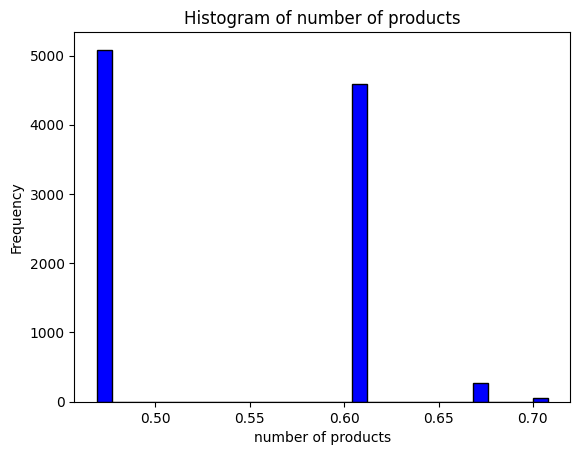

In [41]:
plt.hist(data['NumOfProducts'], bins=30, color="blue", edgecolor="black")
plt.xlabel("number of products")
plt.ylabel("Frequency")
plt.title("Histogram of number of products")
plt.show()

In [43]:
#binning data as it is discrete and we dont't want to change values
# Equal-width binning (3 bins)
import pandas as pd
data['NumOfProducts'] = pd.cut(data['NumOfProducts'], bins=3, labels=['small', 'Medium', 'big'])
print(data['NumOfProducts'])

# Equal-frequency binning (quantiles, 3 bins)
data['NumOfProducts'] = pd.qcut(data['Age'], q=3, labels=['small', 'Medium', 'big'])
print(data)

0        small
1        small
2          big
3       Medium
4        small
         ...  
9995    Medium
9996     small
9997     small
9998    Medium
9999     small
Name: NumOfProducts, Length: 10000, dtype: category
Categories (3, object): ['small' < 'Medium' < 'big']
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532 

In [ ]:
data['NumOfProducts'].min()#the value now isn't true 0.005546758022440364 after making so many transformation

0.005546758022440364

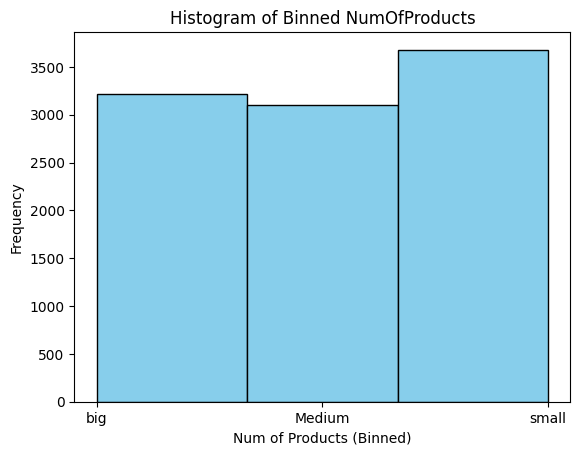

In [44]:
plt.hist(data['NumOfProducts'], bins=3, edgecolor="black", color="skyblue")
plt.xlabel("Num of Products (Binned)")
plt.ylabel("Frequency")
plt.title("Histogram of Binned NumOfProducts")
plt.show()


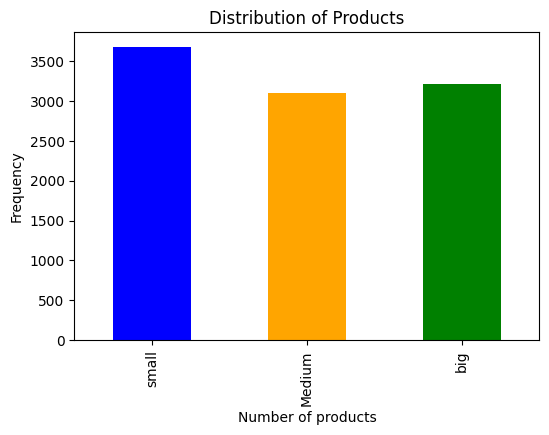

In [ ]:
bin_counts = data['NumOfProducts'].value_counts().sort_index()

# Plot the binned categories
plt.figure(figsize=(6,4))
bin_counts.plot(kind='bar', color=['blue', 'orange', 'green'])

# Labels and Title
plt.xlabel("Number of products")
plt.ylabel("Frequency")
plt.title("Distribution of Products")

plt.show()

In [12]:
data.var(numeric_only=True)

CustomerId         5.174815e+09
CreditScore        9.341860e+03
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [ ]:
#tenure has low variance


In [ ]:
#number of products has low variance


In [ ]:
#hascrcard has low variance


In [ ]:
#is active member has low variance


In [ ]:
#exited has low variance

In [48]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:

# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)




Number of duplicate rows: 0


In [50]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


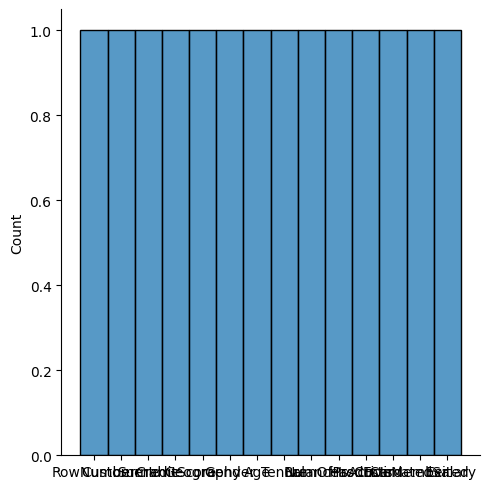

In [52]:
#sns.displot(data[''])#error
sns.displot(data.columns)#exactly

<Axes: xlabel='Age', ylabel='Balance'>

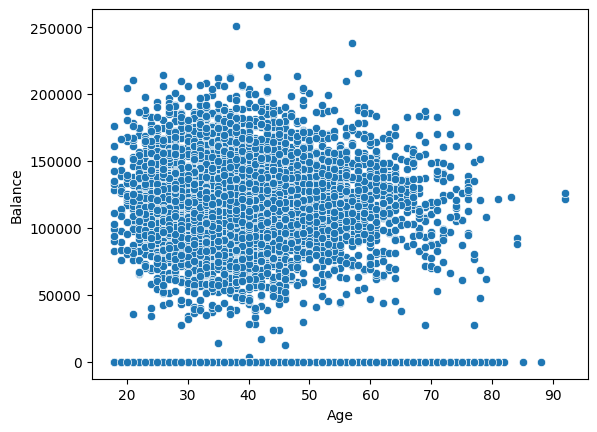

In [ ]:
#correlation between features
sns.scatterplot(x=data['Age'], y=data['Balance'])

In [57]:
# Compute correlation matrix
correlation_matrix = data['Age'].corr(data['Balance'])#it only works with numerical data and you have some categorical 

# Visualize using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


ValueError: Must pass 2-d input. shape=()

<Figure size 1000x800 with 0 Axes>

In [ ]:
x= True
while x:
    try:
        
        user_input = float(input("Enter SAT score to predict GPA (or type '0' to quit): "))
        if user_input != 0:
            user_input_array = np.array([[user_input]])  #2D array FOR sklearn
            predicted_gpa = model.predict(user_input_array)
            print(f"Predicted GPA for SAT score {user_input} is {predicted_gpa[0]:.2f}")
        else: 
             x = False
    except ValueError:
        print("Please enter a valid number or type 'exit' to quit.")
        break

In [ ]:
def remove_outliers(df):
    #print(df)
    data=df['price']
    #print(data)
    q1=data.quantile(0.25)
    #print(q1)
    q3=data.quantile(0.75)
    #print(q3)
    iqr=q3-q1
    #print(iqr)
    df[(data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))]=np.nan
    df=df.dropna()
    return df

Datawithoutoutlier=remove_outliers(Data)  
print(Datawithoutoutlier.shape)
print(Data.shape)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=True)